<a href="https://colab.research.google.com/github/happy-table/Machine-Learning/blob/main/Heart-disease-detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham.csv


In [ ]:
heart = pd.read_csv('framingham.csv')
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
heart.shape

(4240, 16)

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
heart.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
heart.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
heart.dtypes

,0
male,int64
age,int64
education,float64
currentSmoker,int64
cigsPerDay,float64
BPMeds,float64
prevalentStroke,int64
prevalentHyp,int64
diabetes,int64
totChol,float64


In [ ]:
heart.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
df = heart.dropna(axis=0)

In [ ]:
print(heart.shape)
print(df.shape)

(4240, 16)
(3658, 16)


<Figure size 800x1200 with 0 Axes>

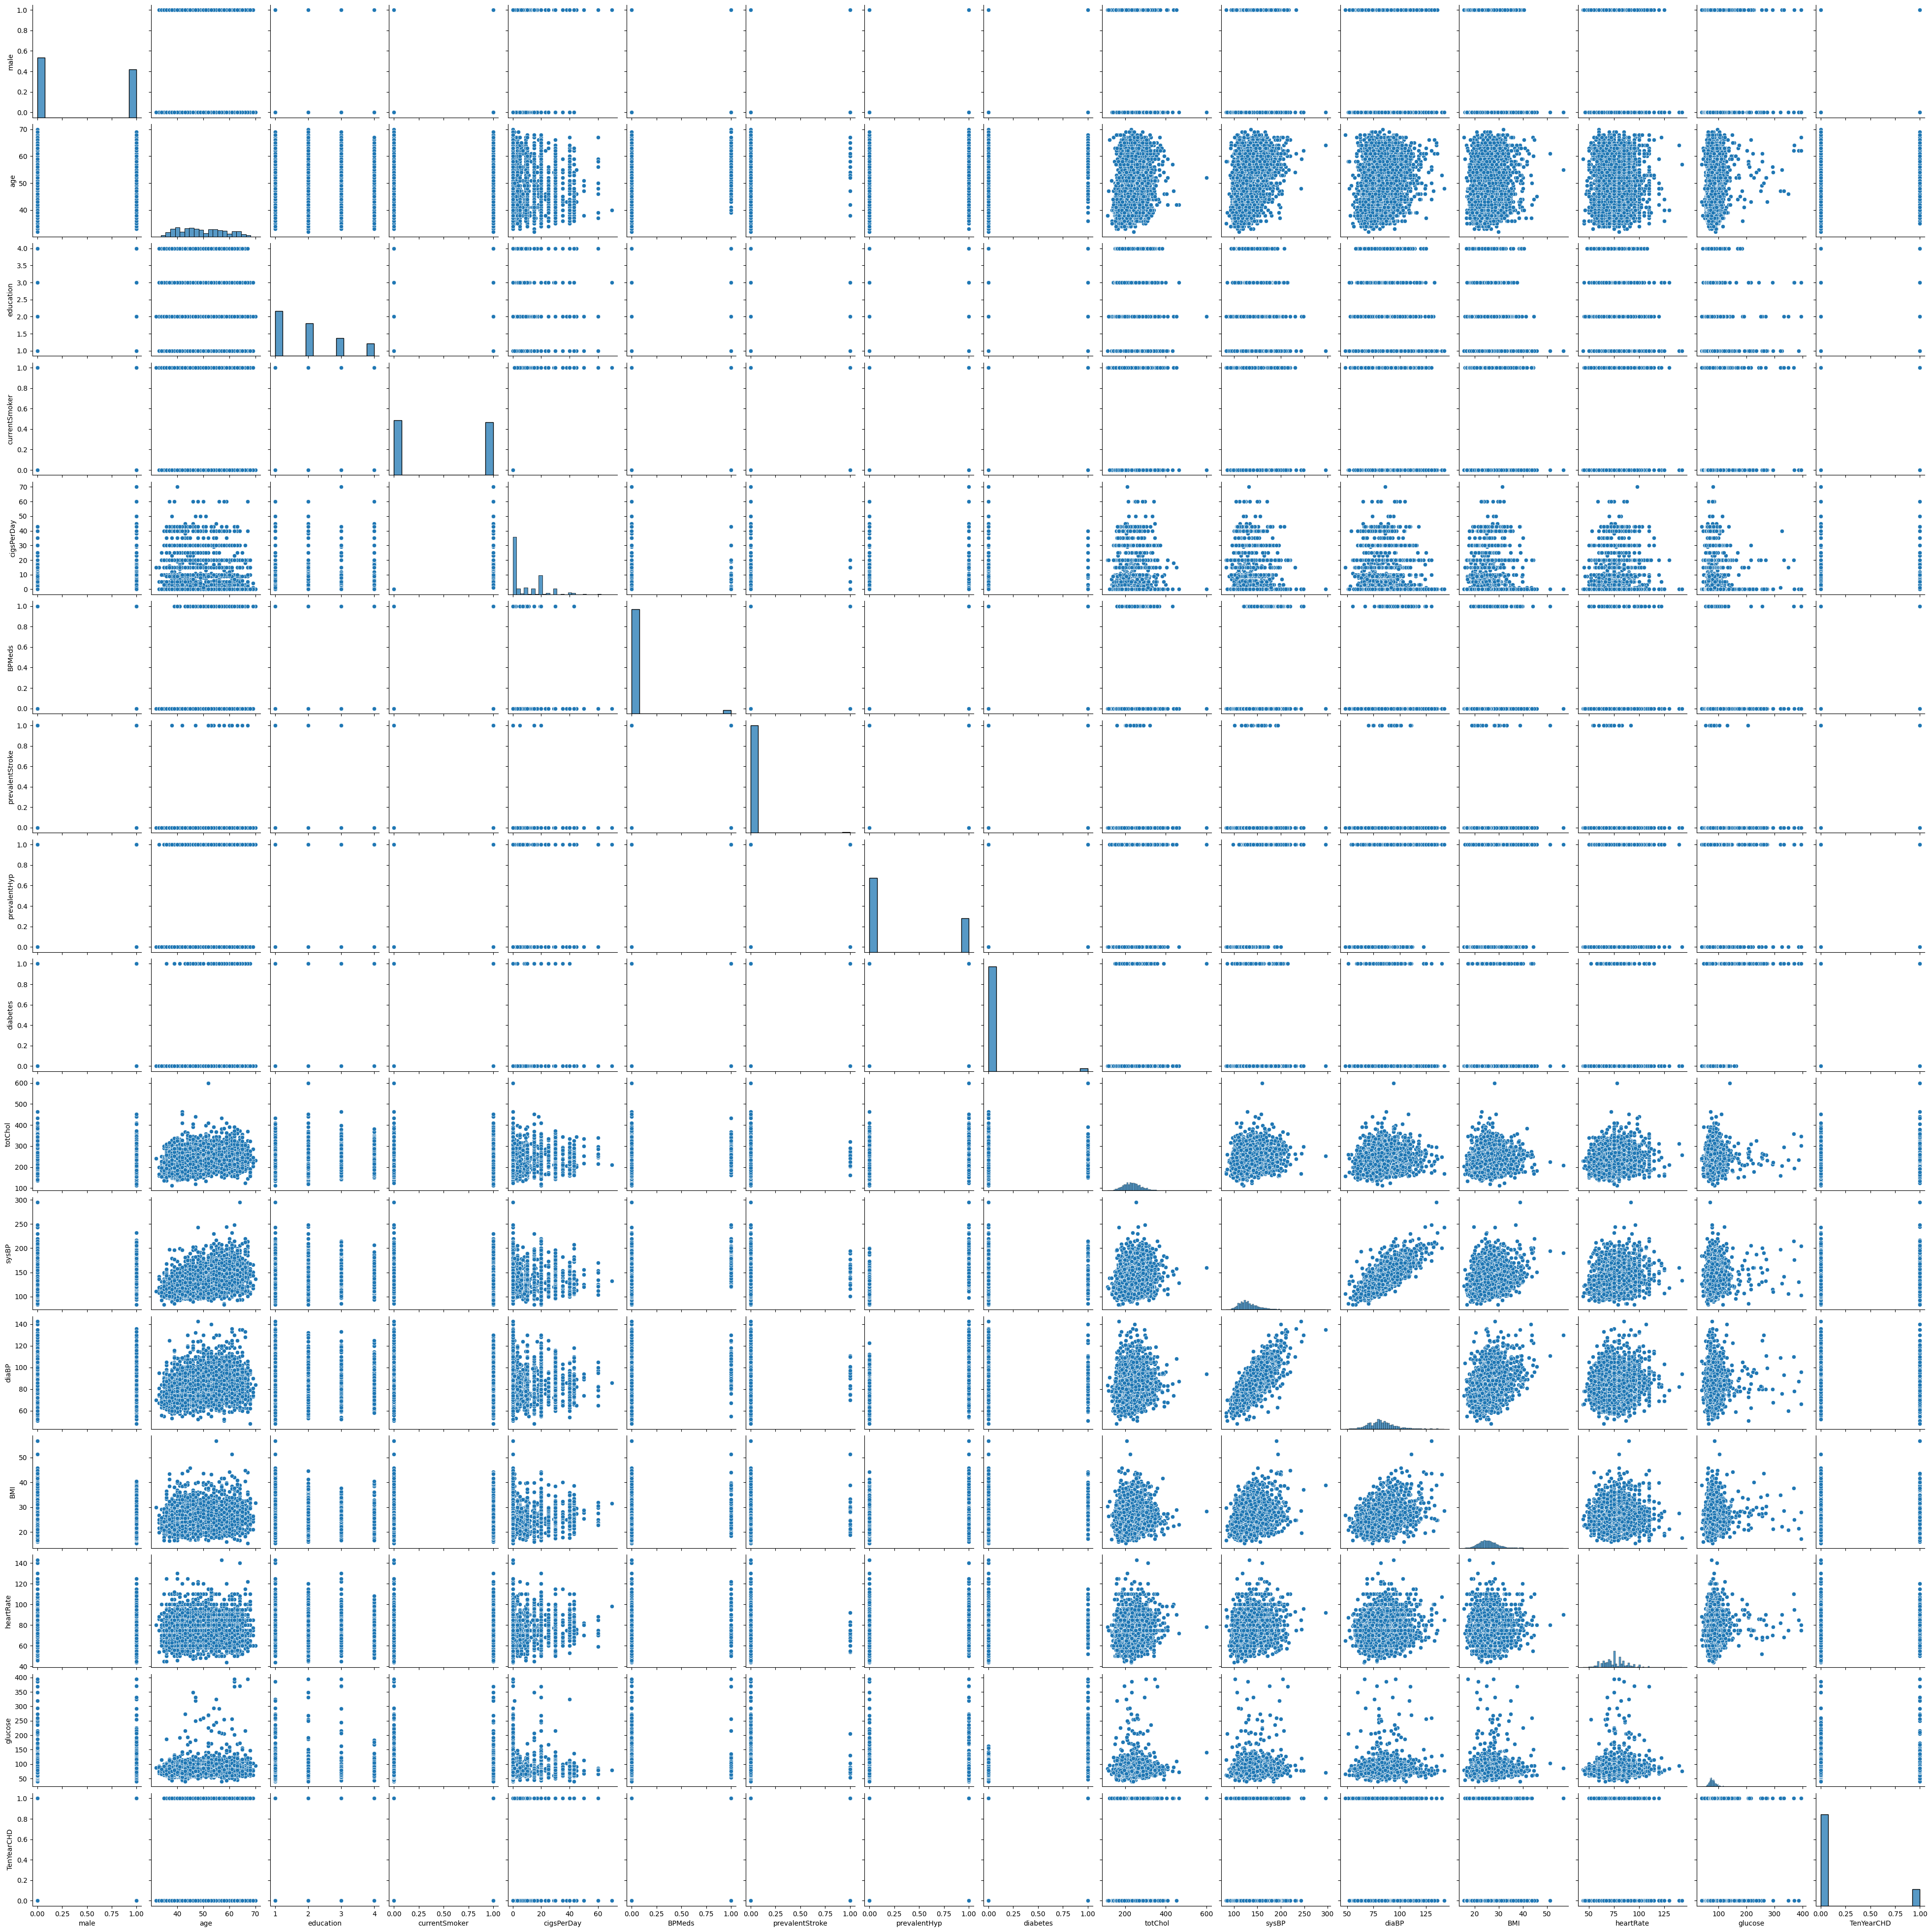

In [ ]:
plt.figure(figsize=(8,12))
sns.pairplot(df)
plt.show()

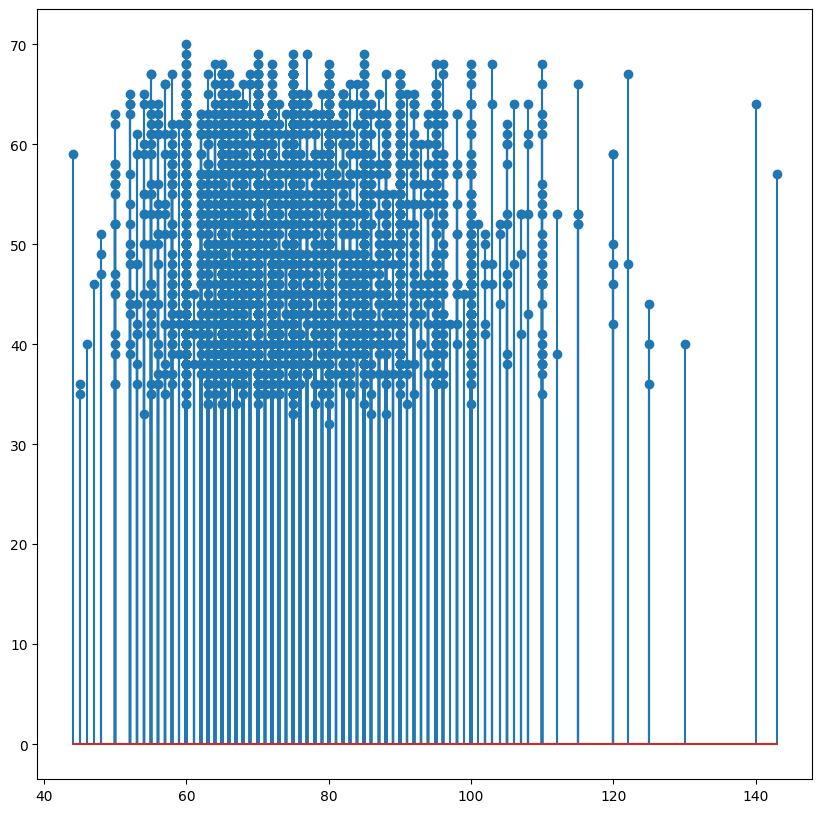

In [ ]:
plt.figure(figsize=(10,10))
plt.stem(df['heartRate'], df['age'])
plt.show()

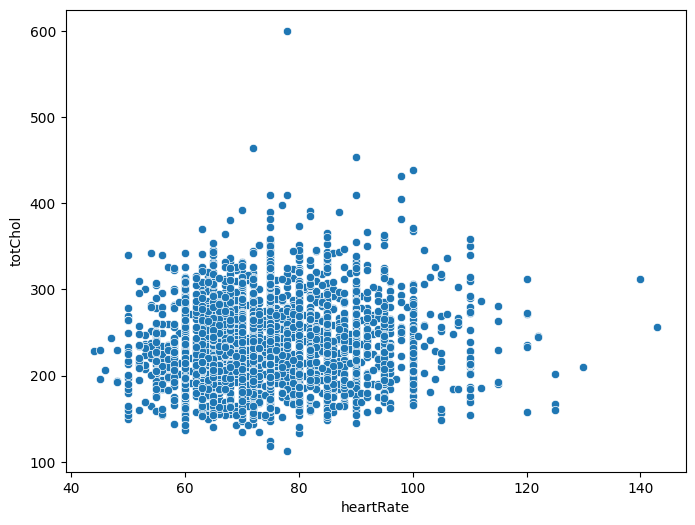

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='heartRate', y='totChol', data=df)
plt.show()

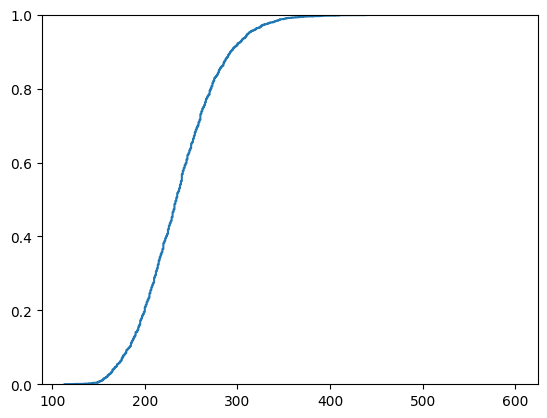

In [ ]:
plt.ecdf(x='totChol', orientation='vertical', data=df )
plt.show()

<Figure size 800x1000 with 0 Axes>

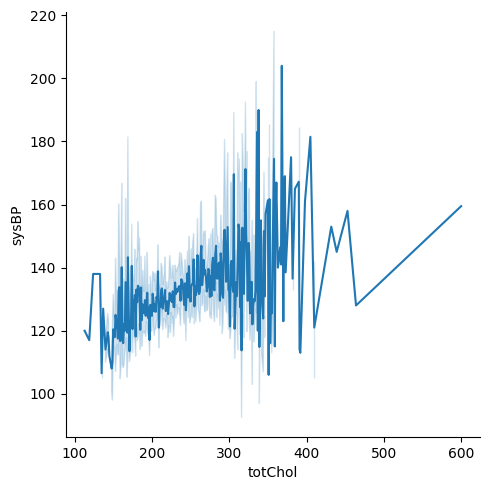

In [ ]:
plt.figure(figsize=(8,10))
sns.relplot(data=df, x="totChol", y="sysBP", kind="line")
plt.show()

<Figure size 800x1000 with 0 Axes>

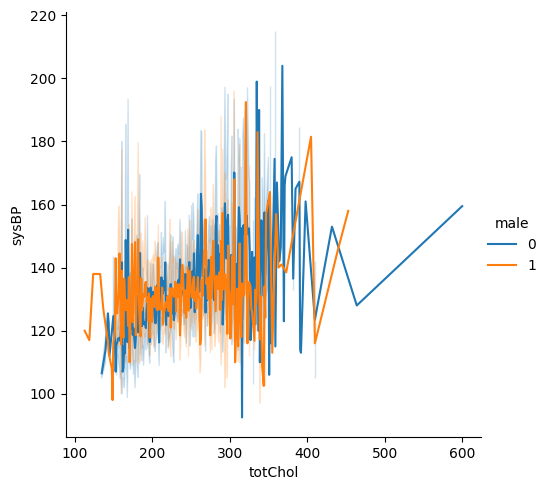

In [ ]:
plt.figure(figsize=(8,10))
sns.relplot(data=df, x="totChol", y="sysBP", kind="line",hue="male")
plt.show()

In [ ]:
x = df.iloc[:,:-1]
x.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [ ]:
x.shape

(3658, 15)

In [ ]:
y = df['TenYearCHD']
y

,TenYearCHD
0,0
1,0
2,0
3,1
4,0
...,...
4233,1
4234,0
4237,0
4238,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled = sc.fit_transform(df)
print(scaled)

[[ 1.11975484 -1.23257968  1.97520875 ...  0.35637003 -0.20304365
  -0.42381538]
 [-0.89305263 -0.41490473  0.01924946 ...  1.60846859 -0.24488308
  -0.42381538]
 [ 1.11975484 -0.18128332 -0.95873018 ... -0.06099616 -0.49591969
  -0.42381538]
 ...
 [-0.89305263  0.28595951  0.01924946 ...  0.35637003  1.05213942
  -0.42381538]
 [ 1.11975484 -1.11576897  0.99722911 ... -0.72878206 -0.41224082
  -0.42381538]
 [-0.89305263 -1.23257968  0.99722911 ...  0.77373621 -0.07752534
  -0.42381538]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score , confusion_matrix, classification_report
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc = roc_auc_score(y_test,y_prob)
cm = confusion_matrix(y_test, y_pred)
CR = classification_report(y_test, y_pred)
print(" Alternatives Metrics by Logistic Regression")
print("Accuracy is:",acc*100)
print("F1 is:",f1*100)
print("ROC is:",roc*100)
print("Confusion Matrix is:")
print(cm)
print("Classification Report is:")
print(CR)

 Alternatives Metrics by Logistic Regression
Accuracy is: 84.60837887067395
F1 is: 10.582010582010582
ROC is: 74.8576464208243
Confusion Matrix is:
[[919   3]
 [166  10]]
Classification Report is:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       922
           1       0.77      0.06      0.11       176

    accuracy                           0.85      1098
   macro avg       0.81      0.53      0.51      1098
weighted avg       0.83      0.85      0.79      1098



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
y_prob = model1.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score , confusion_matrix, classification_report
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc = roc_auc_score(y_test,y_prob)
cm = confusion_matrix(y_test, y_pred)
CR = classification_report(y_test, y_pred)
print(" Alternatives Metrics by KNN")
print("Accuracy is:",acc*100)
print("F1 is:",f1*100)
print("ROC is:",roc*100)
print("Confusion Matrix is:")
print(cm)
print("Classification Report is:")
print(CR)

 Alternatives Metrics by KNN
Accuracy is: 82.78688524590164
F1 is: 14.479638009049776
ROC is: 61.057976730427924
Confusion Matrix is:
[[893  29]
 [160  16]]
Classification Report is:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       922
           1       0.36      0.09      0.14       176

    accuracy                           0.83      1098
   macro avg       0.60      0.53      0.52      1098
weighted avg       0.77      0.83      0.78      1098



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion="entropy", max_depth=5,random_state=42)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
y_prob = model2.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score, confusion_matrix, classification_report
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc = roc_auc_score(y_test,y_prob)
cm = confusion_matrix(y_test, y_pred)
CR = classification_report(y_test, y_pred)
print(" Alternatives Metrics by DecisionTreeClassifier")
print("Accuracy is:",acc*100)
print("F1 is:",f1*100)
print("ROC is:",roc*100)
print("Confusion Matrix is:")
print(cm)
print("Classification Report is:")
print(CR)

 Alternatives Metrics by DecisionTreeClassifier
Accuracy is: 83.06010928961749
F1 is: 17.699115044247787
ROC is: 64.4149945770065
Confusion Matrix is:
[[892  30]
 [156  20]]
Classification Report is:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       922
           1       0.40      0.11      0.18       176

    accuracy                           0.83      1098
   macro avg       0.63      0.54      0.54      1098
weighted avg       0.78      0.83      0.79      1098



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=200)
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
y_prob = model3.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score, confusion_matrix, classification_report
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc = roc_auc_score(y_test,y_prob)
cm = confusion_matrix(y_test, y_pred)
CR = classification_report(y_test, y_pred)
print(" Alternatives Metrics by RandomForestClassifier")
print("Accuracy is:",acc*100)
print("F1 is:",f1*100)
print("ROC is:",roc*100)
print("Confusion Matrix is:")
print(cm)
print("Classification Report is:")
print(CR)

 Alternatives Metrics by RandomForestClassifier
Accuracy is: 84.3351548269581
F1 is: 7.526881720430108
ROC is: 70.0847958982449
Confusion Matrix is:
[[919   3]
 [169   7]]
Classification Report is:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       922
           1       0.70      0.04      0.08       176

    accuracy                           0.84      1098
   macro avg       0.77      0.52      0.49      1098
weighted avg       0.82      0.84      0.78      1098



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier()
model4.fit(X_train,y_train)
y_pred = model4.predict(X_test)
y_prob = model4.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score, confusion_matrix, classification_report
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc = roc_auc_score(y_test,y_prob)
cm = confusion_matrix(y_test, y_pred)
CR = classification_report(y_test, y_pred)
print(" Alternatives Metrics by XGBoost")
print("Accuracy is:",acc*100)
print("F1 is:",f1*100)
print("ROC is:",roc*100)
print("Confusion Matrix is:")
print(cm)
print("Classification Report is:")
print(CR)

 Alternatives Metrics by XGBoost
Accuracy is: 83.6976320582878
F1 is: 12.682926829268293
ROC is: 70.4579348254782
Confusion Matrix is:
[[906  16]
 [163  13]]
Classification Report is:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       922
           1       0.45      0.07      0.13       176

    accuracy                           0.84      1098
   macro avg       0.65      0.53      0.52      1098
weighted avg       0.78      0.84      0.78      1098



In [ ]:
models = {'Logistic Regression':model, 'KNN':model1, 'Decision Tree':model2, 'Random Forest':model3, 'XGBoost':model4}
print("***MODEL PERFORMANCE*** ")
for key,value in models.items():
    y_pred = value.predict(X_test)
    y_prob = value.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc = roc_auc_score(y_test,y_prob)
    cm = confusion_matrix(y_test, y_pred)
    CR = classification_report(y_test, y_pred)
    print("\n",key)
    print("Accuracy is:",acc*100)
    print("F1 is:",f1*100)
    print("ROC is:",roc*100)
    print("Confusion Matrix is:")
    print(cm)
    print("Classification Report is:")
    print(CR)

***MODEL PERFORMANCE*** 

 Logistic Regression
Accuracy is: 84.60837887067395
F1 is: 10.582010582010582
ROC is: 74.8576464208243
Confusion Matrix is:
[[919   3]
 [166  10]]
Classification Report is:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       922
           1       0.77      0.06      0.11       176

    accuracy                           0.85      1098
   macro avg       0.81      0.53      0.51      1098
weighted avg       0.83      0.85      0.79      1098


 KNN
Accuracy is: 82.78688524590164
F1 is: 14.479638009049776
ROC is: 61.057976730427924
Confusion Matrix is:
[[893  29]
 [160  16]]
Classification Report is:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       922
           1       0.36      0.09      0.14       176

    accuracy                           0.83      1098
   macro avg       0.60      0.53      0.52      1098
weighted avg       0.77      0.83      0.7

In [ ]:
# metrics = ["Accuracy", "F1", "ROC_AUC"]
# x = np.arange(len(metrics))
# width = 0.15

# plt.figure(figsize=(10,6))
# for i, (name, res) in enumerate(results.items()):
#     values = [res[m] for m in metrics]
#     plt.bar(x + i*width, values, width, label=name)

# plt.xticks(x + width, metrics)
# plt.ylabel("Score")
# plt.title("Model Comparison: Accuracy, F1, ROC-AUC")
# plt.legend()
# plt.show()
